In [1]:
from mdagent import MDAgent
import os 
import mdtraj as md

In [2]:
descriptive_prompt_7 =  "Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Tell me how many residues are in the chains and beta sheets. 3. Find any known binding or active sites. 4. Simulate for 1 ps at 300 K. 5. Compute the RMSD. 6. Compute the radius of gyration over time. 7. Compute the SASA (solvent accessible surface area)."
non_descriptive_prompt_7 = "Simulate 1LYZ for 1 ps at 300 K. Tell me how many residues are in the chains and beta sheets and any known binding or active sites. Compute the RMSD, SASA, and radius of gyration of the simulation."

Required Tasks:
- Download
- SS Analysis
- Simulation
- RMSD
- Rgy
- SASA
- Binding/Active Sites

In [3]:
llm_model = "claude-3-opus-20240229"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_1.run(descriptive_prompt_7)

Thought: To complete the tasks, I will need to download the PDB file, analyze its structure, find known sites, run a short simulation, and compute various analyses. I'll start by downloading the PDB file.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file, I can analyze the structure to determine the number of residues in the chains and beta sheets.

Action:
```
{
  "action": "GetTurnsBetaSheetsHelices",
  "action_input": {
    "query": "1LYZ",
    "primary_accession": "P00720"
  }
}
```The primary accession number provided does not match any entry in the data, using the first entry instead.
The primary accession number provided does not match any entry in the data, using the first entry instead.
The primary accession number provided does not match any entry in the data, using the first entry instead.
It looks like the GetTurnsBetaSheetsHelices tool did not return the expected structura

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [6]:
registry = agent_1.path_registry
print(registry.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_211532: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_211532
 1LYZ_211626: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_211637: Initial positions for simulation sim0_211637
 sim0_211637: Basic Simulation of Protein 1LYZ_211626
 rec0_211638: Simulation trajectory for protein 1LYZ_211626 and simulation sim0_211637
 rec1_211638: Simulation state log for protein 1LYZ_211626 and simulation sim0_211637
 rec2_211638: Simulation pdb frames for protein 1LYZ_211626 and simulation sim0_211637
 rmsd_211637: RMSD for 211637
 fig0_211716: RMSD plot for 211637


In [7]:
traj_path = registry.get_mapped_path("rec0_211638")
top_path = registry.get_mapped_path("top_sim0_211637")

assert os.path.exists(traj_path)
assert os.path.exists(top_path)
assert os.path.exists(registry.get_mapped_path('rmsd_211637'))

In [8]:
traj = md.load(traj_path, top=top_path)
traj = traj[-1]
#get dssp 
number_of_chains = traj.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of chains: ",number_of_chains)
print("Number of sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of chains:  1
Number of sheets:  12
Number of helices:  47
Number of coils:  70


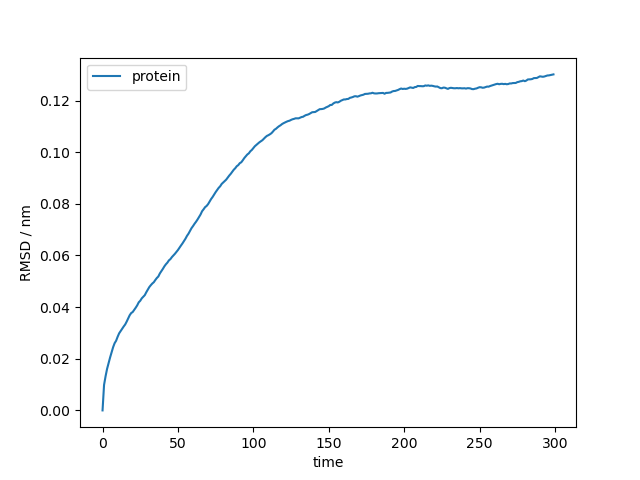

In [9]:
#plot rmsd
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_211716'))

In [12]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_2.run(non_descriptive_prompt_7)

Thought: To simulate 1LYZ and analyze its properties, I will first download the PDB file, then set up and run a short simulation. After that, I can analyze the trajectory to get the requested information about the protein structure and dynamics.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file, I can set up and run a short simulation of 1LYZ at 300K for 1ps. I will use the SetUpandRunFunction tool to do this.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_212055",
    "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME", 
      "nonbondedCutoff": 1.0,
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.000001,
      "ewaldErrorTolerance": 0.0005,
      "solvate": true
    },
    "integrator_params": {
      "integrator_type":

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [13]:
registry = agent_2.path_registry
print(registry.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_212055: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_212055
 1LYZ_212122: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_212139: Initial positions for simulation sim0_212139
 sim0_212139: Basic Simulation of Protein 1LYZ_212122
 rec0_212145: Simulation trajectory for protein 1LYZ_212122 and simulation sim0_212139
 rec1_212145: Simulation state log for protein 1LYZ_212122 and simulation sim0_212139
 rec2_212145: Simulation pdb frames for protein 1LYZ_212122 and simulation sim0_212139
 rec0_212902: dssp values for trajectory with id: rec0_212145


In [14]:
traj_path = registry.get_mapped_path("rec0_212145")
top_path = registry.get_mapped_path("top_sim0_212139")

assert os.path.exists(traj_path)
assert os.path.exists(top_path)

In [16]:
traj = md.load(registry.get_mapped_path('1LYZ_212055'))
#get dssp 
number_of_chains = traj.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of chains: ",number_of_chains)
print("Number of sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of chains:  2
Number of sheets:  14
Number of helices:  50
Number of coils:  65


In [15]:
traj = md.load(traj_path, top=top_path)
traj = traj[-1]
#get dssp 
number_of_chains = traj.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of chains: ",number_of_chains)
print("Number of sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of chains:  3
Number of sheets:  12
Number of helices:  51
Number of coils:  66
